In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets,transforms,models
from torch.utils.data import DataLoader,Dataset
import os
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import copy
from PIL import Image

In [2]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
test_dir=r'data\test'
train_dir=r'data\train'
val_dir=r'data\val'

In [ ]:
train=pd.read_csv(r"data\test.csv")
print(len(train))

314


In [5]:
categories=['Adults','Teenagers','Toddler']

In [6]:
train_transforms=transforms.Compose([transforms.Resize(256),  
                                     torchvision.transforms.CenterCrop(224),
                                 transforms.RandomHorizontalFlip(),                                 
                                 torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0),
                                 transforms.ToTensor(),
                                 torchvision.transforms.Normalize(mean=[0.5, 0.5,0.5],std=[0.25,0.25,0.25])])

transform_val=torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.25, 0.25, 0.25]),
])

In [7]:
train_images=datasets.ImageFolder(train_dir,transform=train_transforms)
train_images=DataLoader(train_images,batch_size=16,shuffle=True)
train_images

In [8]:
val_images=datasets.ImageFolder(val_dir,transform=transform_val)
val_images=DataLoader(val_images,batch_size=16,shuffle=True)
val_images

In [9]:
class CustomDataset(Dataset):
    def __init__(self,main_dir,transform):
        self.main_dir=main_dir
        self.transform=transform
        self.all_imgs=os.listdir(main_dir)
        

    def __len__(self):
        return len(self.all_imgs)

    def __getitem__(self,idx):
        img_loc=os.path.join(self.main_dir,self.all_imgs[idx])
        #print(idx)
        image=Image.open(img_loc)
        tensor_image=self.transform(image)
        return tensor_image,self.all_imgs[idx]

In [10]:
test_loader=CustomDataset(test_dir,transform=transform_val)
test_images=DataLoader(test_loader,batch_size=16,shuffle=False)
test_images

In [11]:
i=0
for img,label in test_images:
    print(img[i],label[i])
    i+=1

tensor([[[ 0.0706,  0.0392,  0.0235,  ...,  0.2431,  0.2588, -0.0078],
         [ 0.1020,  0.0549,  0.0392,  ...,  0.1490,  0.0863, -0.2118],
         [ 0.1176,  0.1020,  0.0863,  ..., -0.1176, -0.3216, -0.5255],
         ...,
         [ 0.9020,  0.8392,  0.7608,  ..., -0.1647,  0.0549, -0.0235],
         [ 0.7137,  0.7451,  0.7765,  ..., -0.0863,  0.0706, -0.3686],
         [ 0.5098,  0.6039,  0.6824,  ..., -0.1647, -0.1490, -0.3529]],

        [[ 0.9804,  0.9490,  0.9333,  ...,  0.9020,  0.8392,  0.4784],
         [ 0.9961,  0.9647,  0.9490,  ...,  0.7765,  0.6196,  0.1961],
         [ 1.0118,  1.0118,  0.9961,  ...,  0.4627,  0.1490, -0.1804],
         ...,
         [ 0.3216,  0.1804, -0.0235,  ...,  0.4471,  0.6824,  0.6510],
         [ 0.1961,  0.1333,  0.0078,  ...,  0.5255,  0.6824,  0.3059],
         [ 0.0549,  0.0078, -0.0549,  ...,  0.4471,  0.4627,  0.3216]],

        [[ 1.0431,  1.0118,  0.9961,  ...,  1.4196,  1.3098,  0.8706],
         [ 1.0902,  1.0431,  0.9961,  ...,  1

tensor([[[-2.0000, -1.9529, -1.9059,  ..., -2.0000, -1.9843, -1.9059],
         [-1.9843, -1.9216, -1.8745,  ..., -2.0000, -1.9843, -1.8902],
         [-1.9686, -1.9059, -1.8588,  ..., -1.8745, -1.8118, -1.5765],
         ...,
         [-1.0118, -1.1373, -1.2000,  ..., -1.9529, -1.9843, -1.9843],
         [-0.1020, -0.2588, -0.3686,  ..., -2.0000, -2.0000, -2.0000],
         [-0.4314, -0.5569, -0.6667,  ..., -2.0000, -2.0000, -2.0000]],

        [[-1.1059, -1.0745, -1.0431,  ..., -1.3882, -1.4353, -1.2627],
         [-1.0431, -1.0118, -0.9804,  ..., -1.3725, -1.4039, -1.2314],
         [-0.9961, -0.9490, -0.9333,  ..., -1.1843, -1.1529, -0.8863],
         ...,
         [-1.3255, -1.3882, -1.4353,  ..., -1.5922, -1.6235, -1.6235],
         [-0.7608, -0.9020, -0.9961,  ..., -1.5608, -1.6078, -1.6078],
         [-1.0745, -1.2000, -1.2784,  ..., -1.5922, -1.6235, -1.6235]],

        [[-1.4039, -1.3098, -1.2471,  ..., -1.5765, -1.6235, -1.4824],
         [-1.3255, -1.2471, -1.2000,  ..., -1

tensor([[[-0.8078, -0.8235, -0.7608,  ..., -0.1176, -0.0863, -0.1020],
         [-0.8863, -0.9020, -0.8706,  ..., -0.1333, -0.0863, -0.1176],
         [-0.8706, -0.8392, -0.7922,  ..., -0.1176, -0.0706, -0.1020],
         ...,
         [ 0.8078,  0.8078,  0.8549,  ..., -0.0863,  0.0706,  0.1804],
         [ 0.8706,  0.8706,  0.8863,  ..., -0.0549, -0.4000, -0.2118],
         [ 0.9804,  0.9176,  0.8863,  ...,  0.0549, -0.3216, -0.1020]],

        [[-0.9020, -0.9176, -0.8706,  ..., -0.8235, -0.8078, -0.8235],
         [-0.9804, -0.9961, -0.9647,  ..., -0.8392, -0.8392, -0.8549],
         [-0.9804, -0.9490, -0.9020,  ..., -0.8235, -0.8235, -0.8392],
         ...,
         [ 0.4784,  0.4627,  0.4941,  ..., -0.0863,  0.0392,  0.1333],
         [ 0.5412,  0.5255,  0.5255,  ..., -0.0392, -0.4471, -0.2745],
         [ 0.6510,  0.5882,  0.5098,  ...,  0.0706, -0.3686, -0.1647]],

        [[-0.9020, -0.9176, -0.8706,  ..., -0.8706, -0.8549, -0.8706],
         [-0.9804, -0.9961, -0.9804,  ..., -0

IndexError: index 16 is out of bounds for dimension 0 with size 16

In [12]:
model = models.resnet18(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [13]:
for p in model.parameters():
    p.requires_grad=False
num_epochs=120

In [14]:
model.last_linear=nn.Linear(in_features=512,out_features=8)
last_layer_feat=model.fc.in_features
model.fc=nn.Sequential(nn.Linear(last_layer_feat, 256),
                         nn.ReLU(),
                         nn.Dropout(0.5),
                         nn.Linear(256,len(categories)))
                         
model=model.to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
def training_time(model,criterion,optimizer,scheduler,num_epochs=num_epochs):
    model.train()
    best_model_stat=copy.deepcopy(model.state_dict())
    best_accuracy=0.0
    for epoch in range(num_epochs):
        print("Epoch ",epoch+1,"/",num_epochs,'\t')
        
        running_loss=0.0
        correct=0
        total=0
        print("Train-Data:")
        for batch_idx,(inputs,labels) in enumerate(train_images):
            inputs=inputs.to(device)
            labels=labels.to(device)
            optimizer.zero_grad()
            outputs=model(inputs)
            _,preds=outputs.max(1)
            loss=criterion(outputs,labels.long())
            loss.backward()
            optimizer.step()
            #scheduler.step()
            total+=labels.size(0)
            running_loss+=loss.item()            
            correct+=preds.eq(labels).sum().item()
            
        final_loss=running_loss/(batch_idx+1)
        acc=(correct/total)*100.00
        
        print('Loss : {:.4f} | Accuracy : {:.4f} | {}/{}'.format(final_loss,acc,correct,total))
        print("Validation-Data")
        model.eval()
        val_loss=0.0
        correct=0
        total=0
        for batch_idx,(inputs,labels) in enumerate(val_images):
            inputs=inputs.to(device)
            labels=labels.to(device)
            outputs=model(inputs)
            loss=criterion(outputs,labels.long())
            val_loss+=loss.item()
            _,preds=torch.max(outputs,1)
            total+=labels.size(0)
            correct+=preds.eq(labels).sum().item()
        final_val_loss=val_loss/(batch_idx+1)
        val_acc=(correct/total)*100.00
        print('Loss : {:.4f} | Accuracy : {:.4f} | {}/{}'.format(final_val_loss,val_acc,correct,total)) 
        if val_acc>best_accuracy:
            best_accuracy=val_acc
            best_model_stat=copy.deepcopy(model.state_dict())
        print("-"*10)
            
    print('Best Accuracy : {:.4f}'.format(best_accuracy))
    model.load_state_dict(best_model_stat)
    return model    

In [16]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001,weight_decay=1e-5)
#step_lr=lr_scheduler.StepLR(optimizer,step_size=7,gamma=0.1)


In [17]:
model_trained=training_time(model,criterion,optimizer,num_epochs)

Epoch  1 / 120 	
Train-Data:
Loss : 1.1417 | Accuracy : 43.7888 | 141/322
Validation-Data
Loss : 1.0495 | Accuracy : 45.0704 | 32/71
----------
Epoch  2 / 120 	
Train-Data:
Loss : 0.9693 | Accuracy : 54.0373 | 174/322
Validation-Data
Loss : 0.9741 | Accuracy : 49.2958 | 35/71
----------
Epoch  3 / 120 	
Train-Data:
Loss : 0.9473 | Accuracy : 54.6584 | 176/322
Validation-Data
Loss : 0.9584 | Accuracy : 49.2958 | 35/71
----------
Epoch  4 / 120 	
Train-Data:
Loss : 0.9108 | Accuracy : 55.9006 | 180/322
Validation-Data
Loss : 0.9108 | Accuracy : 54.9296 | 39/71
----------
Epoch  5 / 120 	
Train-Data:
Loss : 0.8482 | Accuracy : 66.1491 | 213/322
Validation-Data
Loss : 0.8446 | Accuracy : 52.1127 | 37/71
----------
Epoch  6 / 120 	
Train-Data:
Loss : 0.8181 | Accuracy : 60.2484 | 194/322
Validation-Data
Loss : 0.8324 | Accuracy : 57.7465 | 41/71
----------
Epoch  7 / 120 	
Train-Data:
Loss : 0.8014 | Accuracy : 65.2174 | 210/322
Validation-Data
Loss : 0.8021 | Accuracy : 60.5634 | 43/71
---

Loss : 0.2570 | Accuracy : 97.1831 | 69/71
----------
Epoch  58 / 120 	
Train-Data:
Loss : 0.2602 | Accuracy : 93.4783 | 301/322
Validation-Data
Loss : 0.2451 | Accuracy : 95.7746 | 68/71
----------
Epoch  59 / 120 	
Train-Data:
Loss : 0.2434 | Accuracy : 92.8571 | 299/322
Validation-Data
Loss : 0.2487 | Accuracy : 97.1831 | 69/71
----------
Epoch  60 / 120 	
Train-Data:
Loss : 0.2432 | Accuracy : 93.7888 | 302/322
Validation-Data
Loss : 0.2491 | Accuracy : 92.9577 | 66/71
----------
Epoch  61 / 120 	
Train-Data:
Loss : 0.2441 | Accuracy : 92.8571 | 299/322
Validation-Data
Loss : 0.2240 | Accuracy : 94.3662 | 67/71
----------
Epoch  62 / 120 	
Train-Data:
Loss : 0.3004 | Accuracy : 94.0994 | 303/322
Validation-Data
Loss : 0.2482 | Accuracy : 97.1831 | 69/71
----------
Epoch  63 / 120 	
Train-Data:
Loss : 0.2502 | Accuracy : 93.1677 | 300/322
Validation-Data
Loss : 0.2158 | Accuracy : 97.1831 | 69/71
----------
Epoch  64 / 120 	
Train-Data:
Loss : 0.2158 | Accuracy : 95.6522 | 308/322
V

Loss : 0.1287 | Accuracy : 96.2733 | 310/322
Validation-Data
Loss : 0.0872 | Accuracy : 100.0000 | 71/71
----------
Epoch  115 / 120 	
Train-Data:
Loss : 0.1170 | Accuracy : 97.8261 | 315/322
Validation-Data
Loss : 0.0844 | Accuracy : 100.0000 | 71/71
----------
Epoch  116 / 120 	
Train-Data:
Loss : 0.1124 | Accuracy : 96.2733 | 310/322
Validation-Data
Loss : 0.0779 | Accuracy : 100.0000 | 71/71
----------
Epoch  117 / 120 	
Train-Data:
Loss : 0.1035 | Accuracy : 98.4472 | 317/322
Validation-Data
Loss : 0.0782 | Accuracy : 100.0000 | 71/71
----------
Epoch  118 / 120 	
Train-Data:
Loss : 0.1070 | Accuracy : 97.5155 | 314/322
Validation-Data
Loss : 0.0850 | Accuracy : 100.0000 | 71/71
----------
Epoch  119 / 120 	
Train-Data:
Loss : 0.1197 | Accuracy : 97.2050 | 313/322
Validation-Data
Loss : 0.0721 | Accuracy : 100.0000 | 71/71
----------
Epoch  120 / 120 	
Train-Data:
Loss : 0.1166 | Accuracy : 96.2733 | 310/322
Validation-Data
Loss : 0.0805 | Accuracy : 100.0000 | 71/71
----------
Be

In [ ]:
torch.save(model_trained.state_dict(), r"friend.pth")

In [19]:
model_trained.eval()
test_predictions=[]
img_l=[]
i=0
for p,label in (test_images):
    p=p.to(device)
    outputs=model_trained.forward(p)
    _, preds=outputs.max(1)    
    test_predictions.append(preds)
    img_l.append(label)
img_l

[('Img1001.jpg',
  'Img1017.jpg',
  'Img1020.jpg',
  'Img1025.jpg',
  'Img1038.jpg',
  'Img1064.jpg',
  'Img1071.jpg',
  'Img1073.jpg',
  'Img1077.jpg',
  'Img1090.jpg',
  'Img1093.jpg',
  'Img1109.jpg',
  'Img1114.jpg',
  'Img1115.jpg',
  'Img1122.jpg',
  'Img1136.jpg'),
 ('Img1137.jpg',
  'Img1153.jpg',
  'Img1154.jpg',
  'Img1155.jpg',
  'Img1156.jpg',
  'Img1157.jpg',
  'Img1168.jpg',
  'Img1175.jpg',
  'Img1182.jpg',
  'Img1183.jpg',
  'Img1186.jpg',
  'Img1208.jpg',
  'Img1212.jpg',
  'Img1248.jpg',
  'Img1252.jpg',
  'Img1270.jpg'),
 ('Img1279.jpg',
  'Img1283.jpg',
  'Img1286.jpg',
  'Img1288.jpg',
  'Img1298.jpg',
  'Img1304.jpg',
  'Img1305.jpg',
  'Img1310.jpg',
  'Img1311.jpg',
  'Img1331.jpg',
  'Img1337.jpg',
  'Img1338.jpg',
  'Img1360.jpg',
  'Img1369.jpg',
  'Img1370.jpg',
  'Img1382.jpg'),
 ('Img1388.jpg',
  'Img1389.jpg',
  'Img1393.jpg',
  'Img1401.jpg',
  'Img1403.jpg',
  'Img1415.jpg',
  'Img1417.jpg',
  'Img1439.jpg',
  'Img1444.jpg',
  'Img1448.jpg',
  'Img1451.

In [20]:
test_predictions

[tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]),
 tensor([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 tensor([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [21]:
final=[]
for row in test_predictions:
    for element in row:
        final.append(element.item())


In [22]:
final_labels=[]
for row in img_l:
    for element in row:
        final_labels.append(element)
final_labels

['Img1001.jpg',
 'Img1017.jpg',
 'Img1020.jpg',
 'Img1025.jpg',
 'Img1038.jpg',
 'Img1064.jpg',
 'Img1071.jpg',
 'Img1073.jpg',
 'Img1077.jpg',
 'Img1090.jpg',
 'Img1093.jpg',
 'Img1109.jpg',
 'Img1114.jpg',
 'Img1115.jpg',
 'Img1122.jpg',
 'Img1136.jpg',
 'Img1137.jpg',
 'Img1153.jpg',
 'Img1154.jpg',
 'Img1155.jpg',
 'Img1156.jpg',
 'Img1157.jpg',
 'Img1168.jpg',
 'Img1175.jpg',
 'Img1182.jpg',
 'Img1183.jpg',
 'Img1186.jpg',
 'Img1208.jpg',
 'Img1212.jpg',
 'Img1248.jpg',
 'Img1252.jpg',
 'Img1270.jpg',
 'Img1279.jpg',
 'Img1283.jpg',
 'Img1286.jpg',
 'Img1288.jpg',
 'Img1298.jpg',
 'Img1304.jpg',
 'Img1305.jpg',
 'Img1310.jpg',
 'Img1311.jpg',
 'Img1331.jpg',
 'Img1337.jpg',
 'Img1338.jpg',
 'Img1360.jpg',
 'Img1369.jpg',
 'Img1370.jpg',
 'Img1382.jpg',
 'Img1388.jpg',
 'Img1389.jpg',
 'Img1393.jpg',
 'Img1401.jpg',
 'Img1403.jpg',
 'Img1415.jpg',
 'Img1417.jpg',
 'Img1439.jpg',
 'Img1444.jpg',
 'Img1448.jpg',
 'Img1451.jpg',
 'Img1466.jpg',
 'Img1472.jpg',
 'Img1474.jpg',
 'Img148

In [23]:
category_final=[]
for name in final:
    if name==0:
        category_final.append('Adults')
    elif name==1:
        category_final.append('Teenagers')
    elif name==2:
        category_final.append('Toddler')


In [ ]:
sub=pd.read_csv(r'results.csv')

In [25]:
sub.head()

,Unnamed: 0,Filename,Category
0,0,Img1001.jpg,Adults
1,1,Img1017.jpg,Adults
2,2,Img1020.jpg,Adults
3,3,Img1025.jpg,Adults
4,4,Img1038.jpg,Adults


In [26]:
sub["Filename"]=final_labels

In [27]:
sub["Category"]=category_final

In [28]:
sub.head(10)

,Unnamed: 0,Filename,Category
0,0,Img1001.jpg,Adults
1,1,Img1017.jpg,Adults
2,2,Img1020.jpg,Adults
3,3,Img1025.jpg,Adults
4,4,Img1038.jpg,Adults
5,5,Img1064.jpg,Adults
6,6,Img1071.jpg,Adults
7,7,Img1073.jpg,Teenagers
8,8,Img1077.jpg,Adults
9,9,Img1090.jpg,Adults


In [ ]:
sub.to_csv(r'results.csv')

Displaying predictions from results.csv

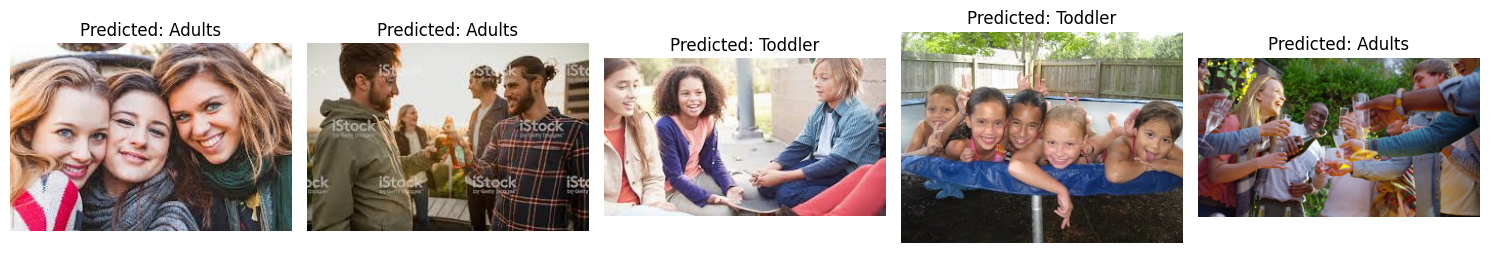

In [5]:
import pandas as pd
import random
import os
import cv2
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")
test_folder = r"data\test"
sample = df.sample(n=5).reset_index(drop=True)
plt.figure(figsize=(15, 5))
for idx, row in sample.iterrows():
    filename = row['Filename']
    category = row['Category']
    img_path = os.path.join(test_folder, filename)
    img = cv2.imread(img_path)
    if img is None:
        continue 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, idx+1)
    plt.imshow(img)
    plt.title(f"Predicted: {category}")
    plt.axis('off')
plt.tight_layout()
plt.show()


To Load the Model for predictions

In [1]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
categories = ['Adults', 'Teenagers', 'Toddler']

model = models.resnet18(pretrained=True)
for p in model.parameters():
    p.requires_grad = False

model.last_linear = nn.Linear(in_features=512, out_features=8)

last_layer_feat = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(last_layer_feat, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, len(categories))
)
model = model.to(device)

model.load_state_dict(torch.load(r"friend.pth", map_location=device))
model.eval()

c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jatin\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\jatin\AppData\Local\Temp\ipykernel_23732\2337200395.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpick

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Predictions from test dir

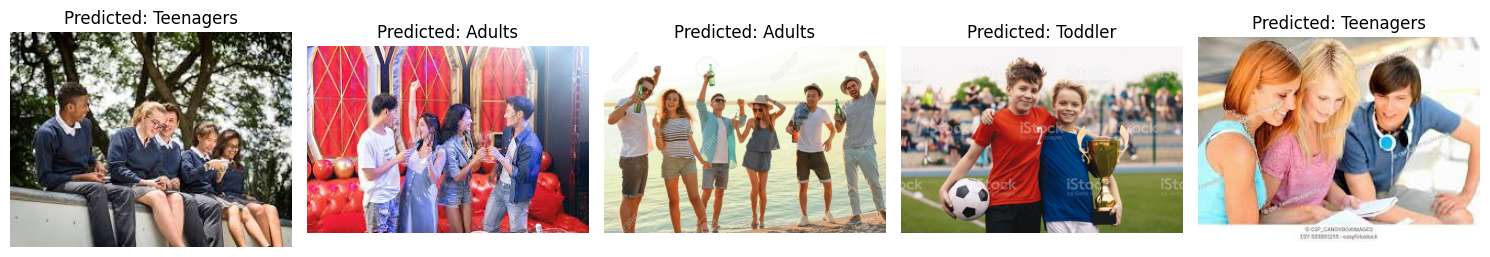

In [4]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms
import torchvision

num_samples = 5
test_folder = r"data\test"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

all_images = [f for f in os.listdir(test_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
sample_images = random.sample(all_images, num_samples)

transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.25, 0.25, 0.25]),
])

plt.figure(figsize=(15, 5))
for idx, img_name in enumerate(sample_images):
    img_path = os.path.join(test_folder, img_name)
    img = Image.open(img_path).convert('RGB')
    input_tensor = transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(input_tensor)
        pred = output.argmax(1).item()
        pred_category = categories[pred]
    plt.subplot(1, num_samples, idx+1)
    plt.imshow(img)
    plt.title(f"Predicted: {pred_category}")
    plt.axis('off')
plt.tight_layout()
plt.show()